In [1]:
# Importing libraries for data handling and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the dataset
dataset = pd.read_csv('incom2024_delay_example_dataset.csv')
dataset

# Project Outline:


## Objective:
- Utilise the given dataset to perform advanced analytics that provide actionable insights into customer behavior, profitability, sales trends, and logistics optimization for an FMCG company. The analysis will focus on demand forecasting, profit maximization, inventory management, and shipping optimization, while considering geographical, category-specific, and payment-type trends.
- This project will demonstrate a comprehensive approach to leveraging the dataset to drive profitability and operational efficiency in a logistics and FMCG context.

## Importing dataset

In [2]:
df_full = pd.read_csv('incom2024_delay_example_dataset.csv')
df_full.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.0,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.0,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
3,TRANSFER,-89.463196,99.15065,17.0,Cleats,Caguas,Puerto Rico,546.5306,Consumer,PR,...,Central America,Santa Ana,PROCESSING,365.0,17.0,Perfect Fitness Perfect Rip Deck,59.99,2017-03-18 00:00:00+00:00,Second Class,0
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1


In [3]:
variable_desc = pd.read_csv('incom2024_delay_variable_description.csv')
variable_desc

,variable_name,type,description
0,payment_type,categorical,Type of transaction made
1,profit_per_order,numerical,Earnings per order placed
2,sales_per_customer,numerical,Total sales per customer made per customer
3,category_id,numerical,Product category code
4,category_name,text,Description of the product category
5,customer_city,categorical,City where the customer made the purchase
6,customer_country,categorical,Country where the customer made the purchase
7,customer_id,numerical,Customer ID
8,customer_segment,categorical,"Types of Customers Consumer, Corporate, Home O..."
9,customer_state,categorical,State to which the store where the purchase is...


## 1. Data Preparation
### Tasks:
- Drop irrelevant columns
- Cleaning: Handle missing or inconsistent values in key fields like customer_country, shipping_date, and label (label mapping).
- Transformation: Standardize categorical variables (e.g., payment_type, customer_segment) and convert date fields into appropriate formats for time-series analysis.
- Feature Engineering: Create derived features, such as:
- Profit margin (profit_per_order / sales_per_customer).
- Delivery time (difference between shipping_date and order creation date).
- Product profitability by category or region.

####  Drop irrelevant columns based on project objectives

In [32]:
# List of relevant columns based on project objectives
irrelevant_columns = [
    "customer_zipcode", "department_id", "latitude", "longitude", "customer_id",
    "order_customer_id", "order_item_cardprod_id", "order_id","category_id",
    "order_item_id", "product_card_id", "product_category_id"
]
# Drop irrelevant columns
df = df_full.drop(columns=irrelevant_columns)


#### Summary of the dataset to understand basic structure

In [33]:
print("Dataset Summary:")
print(df.info())

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_name             15549 non-null  object 
 4   customer_city             15549 non-null  object 
 5   customer_country          15549 non-null  object 
 6   customer_segment          15549 non-null  object 
 7   customer_state            15549 non-null  object 
 8   department_name           15549 non-null  object 
 9   market                    15549 non-null  object 
 10  order_city                15549 non-null  object 
 11  order_country             15549 non-null  object 
 12  order_date                15549 non-null  object 
 13  order_item_discount       15549 non-null  fl

#### Mapping the "label" column to string categories

In [34]:

label_mapping = {
    -1: "Early Delivery",
     0: "On-time Delivery",
     1: "Delayed Delivery"
}

df["label"] = df["label"].replace(label_mapping)

df.head()


,payment_type,profit_per_order,sales_per_customer,category_name,customer_city,customer_country,customer_segment,customer_state,department_name,market,...,order_item_total_amount,order_profit_per_order,order_region,order_state,order_status,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,Cardio Equipment,Caguas,Puerto Rico,Consumer,PR,Footwear,Europe,...,84.99157,32.083145,Western Europe,Vienna,COMPLETE,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,Early Delivery
1,TRANSFER,91.193540,181.99008,Water Sports,Albuquerque,EE. UU.,Consumer,CA,Fan Shop,LATAM,...,181.99000,91.235870,South America,Buenos Aires,PENDING,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,Early Delivery
2,DEBIT,8.313806,89.96643,Indoor/Outdoor Games,Amarillo,Puerto Rico,Consumer,PR,Fan Shop,Europe,...,93.81015,6.965549,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,Delayed Delivery
3,TRANSFER,-89.463196,99.15065,Cleats,Caguas,Puerto Rico,Consumer,PR,Apparel,LATAM,...,99.89060,-95.401400,Central America,Santa Ana,PROCESSING,Perfect Fitness Perfect Rip Deck,59.99,2017-03-18 00:00:00+00:00,Second Class,On-time Delivery
4,DEBIT,44.722590,170.97824,Water Sports,Peabody,EE. UU.,Consumer,CA,Fan Shop,LATAM,...,171.07587,44.569000,Central America,Illinois,COMPLETE,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,Delayed Delivery


#### Convert the 'shipping_date and order_date' column to datetime format 

In [35]:
df['shipping_date'] = pd.to_datetime(df['shipping_date'], utc=True)
df['order_date'] = pd.to_datetime(df['order_date'], utc=True)

##### Split shipping_date/ order_date into separate date and time columns

In [36]:
df['order_date_only'] = df['order_date'].dt.date  # Extract date
df['shipping_date_only'] = df['shipping_date'].dt.date  # Extract date

df['order_time_only'] = df['order_date'].dt.time  # Extract time
df['shipping_time_only'] = df['shipping_date'].dt.time  # Extract time

df.head()

,payment_type,profit_per_order,sales_per_customer,category_name,customer_city,customer_country,customer_segment,customer_state,department_name,market,...,order_status,product_name,product_price,shipping_date,shipping_mode,label,order_date_only,shipping_date_only,order_time_only,shipping_time_only
0,DEBIT,34.448338,92.49099,Cardio Equipment,Caguas,Puerto Rico,Consumer,PR,Footwear,Europe,...,COMPLETE,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-12 23:00:00+00:00,Standard Class,Early Delivery,2015-08-11,2015-08-12,23:00:00,23:00:00
1,TRANSFER,91.193540,181.99008,Water Sports,Albuquerque,EE. UU.,Consumer,CA,Fan Shop,LATAM,...,PENDING,Pelican Sunstream 100 Kayak,199.99,2017-04-08 23:00:00+00:00,Standard Class,Early Delivery,2017-02-10,2017-04-08,00:00:00,23:00:00
2,DEBIT,8.313806,89.96643,Indoor/Outdoor Games,Amarillo,Puerto Rico,Consumer,PR,Fan Shop,Europe,...,COMPLETE,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,Delayed Delivery,2015-01-01,2015-03-18,00:00:00,00:00:00
3,TRANSFER,-89.463196,99.15065,Cleats,Caguas,Puerto Rico,Consumer,PR,Apparel,LATAM,...,PROCESSING,Perfect Fitness Perfect Rip Deck,59.99,2017-03-18 00:00:00+00:00,Second Class,On-time Delivery,2017-05-30,2017-03-18,23:00:00,00:00:00
4,DEBIT,44.722590,170.97824,Water Sports,Peabody,EE. UU.,Consumer,CA,Fan Shop,LATAM,...,COMPLETE,Pelican Sunstream 100 Kayak,199.99,2015-03-29 23:00:00+00:00,Standard Class,Delayed Delivery,2015-03-28,2015-03-29,00:00:00,23:00:00


#### Validate Categorical Columns

In [37]:
categorical_cols = list(variable_desc[variable_desc['type'] == 'categorical']['variable_name'])
print(categorical_cols)

['payment_type', 'customer_city', 'customer_country', 'customer_segment', 'customer_state', 'market', 'order_city', 'order_country', 'order_region', 'order_state', 'order_status', 'shipping_mode', 'label']


In [38]:
for cols in categorical_cols:
    print(df[cols].value_counts())
    print()

payment_type
DEBIT       6148
PAYMENT     3849
TRANSFER    3796
CASH        1756
Name: count, dtype: int64

customer_city
Caguas         5964
Brooklyn        300
Chicago         277
Los Angeles     259
Bronx           147
               ... 
Alhambra          1
Everett           1
Folsom            1
Irwin             1
Upland            1
Name: count, Length: 555, dtype: int64

customer_country
EE. UU.        9438
Puerto Rico    6111
Name: count, dtype: int64

customer_segment
Consumer       8332
Corporate      4603
Home Office    2614
Name: count, dtype: int64

customer_state
PR       6109
CA       2531
NY       1105
TX        816
IL        732
FL        435
PA        387
MI        310
OH        301
GA        241
NJ        221
AZ        210
KY        206
MD        206
NV        159
NC        158
VA        114
OR        100
TN         98
CO         94
WA         88
IN         74
HI         70
UT         69
MA         66
WI         65
MN         65
CT         65
SC         60
MO       

#### Check for Duplicates

In [39]:
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicate_rows)}")


Number of duplicate rows: 0


#### Check for Outliers

In [40]:
numeric_cols = [col for col in numeric_cols if col in df.columns]
print(f"Numeric columns for analysis: {numeric_cols}")

Numeric columns for analysis: ['profit_per_order', 'sales_per_customer', 'order_item_discount', 'order_item_discount_rate', 'order_item_product_price', 'order_item_profit_ratio', 'order_item_quantity', 'sales', 'order_item_total_amount', 'order_profit_per_order', 'product_price']


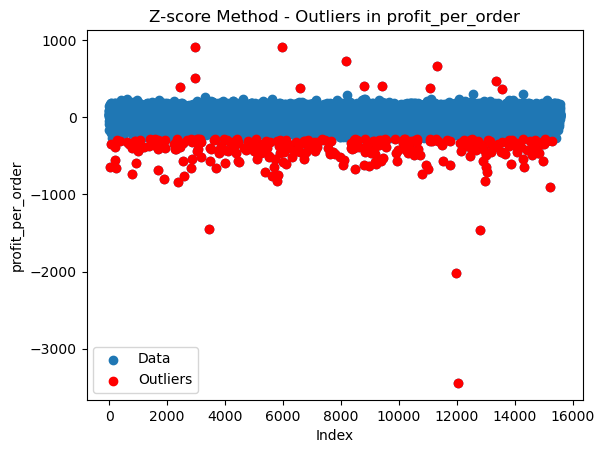

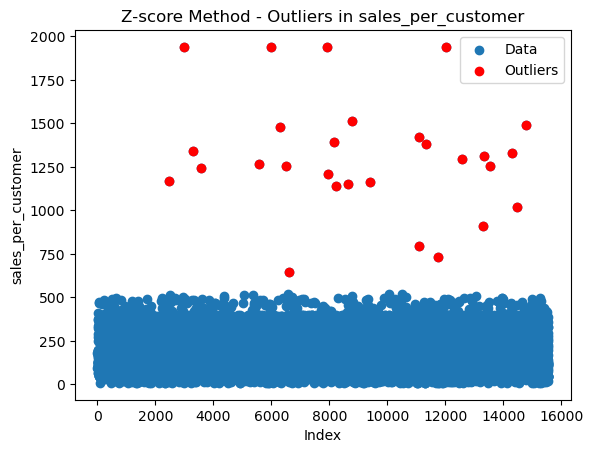

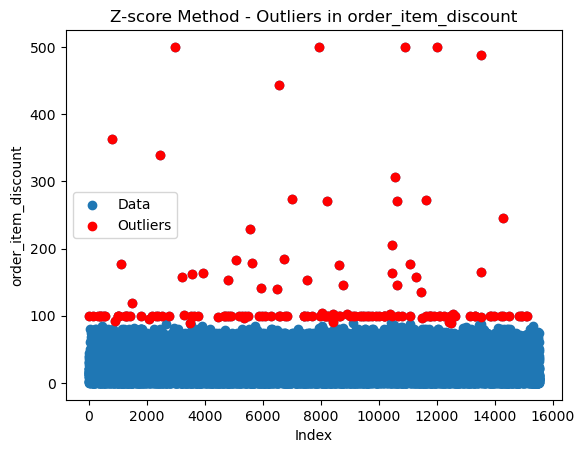

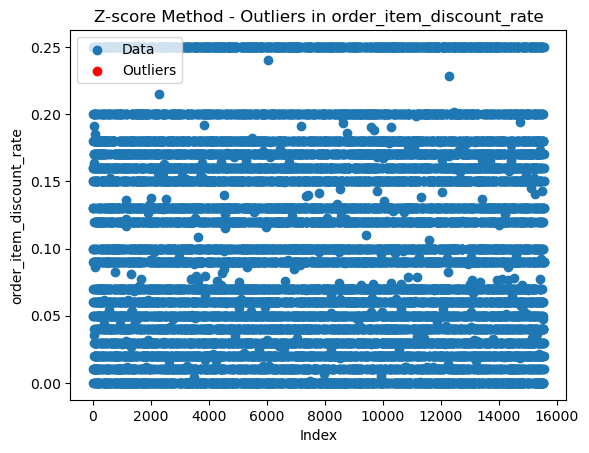

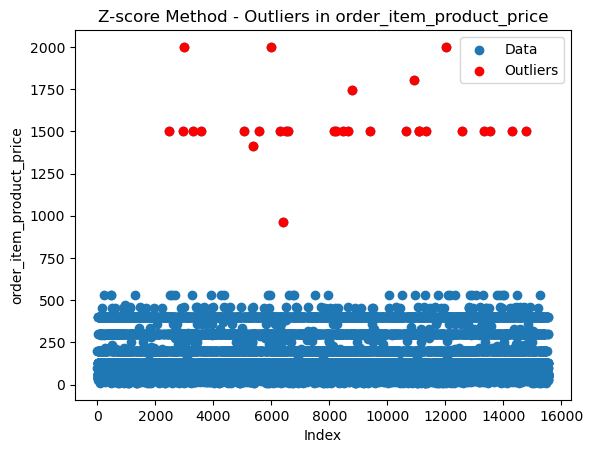

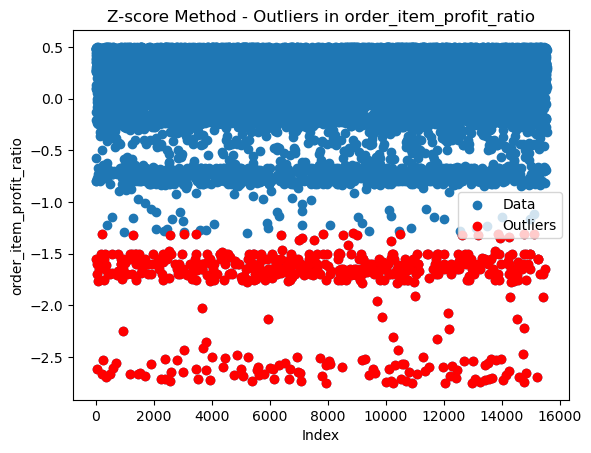

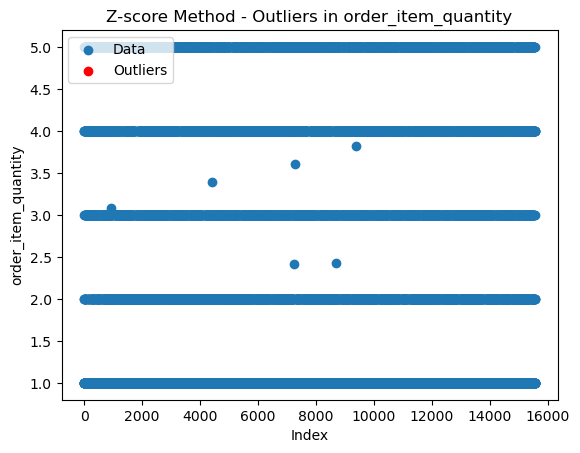

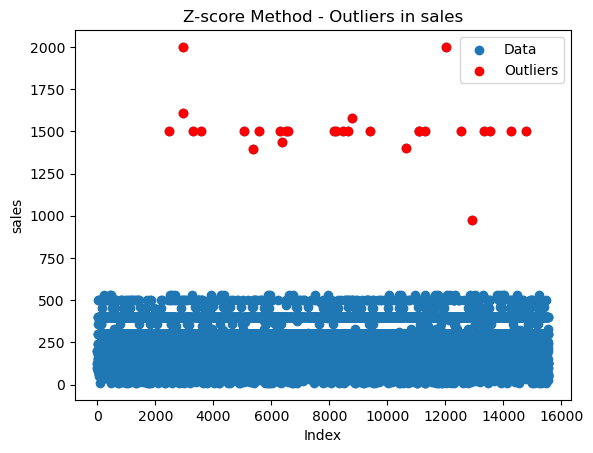

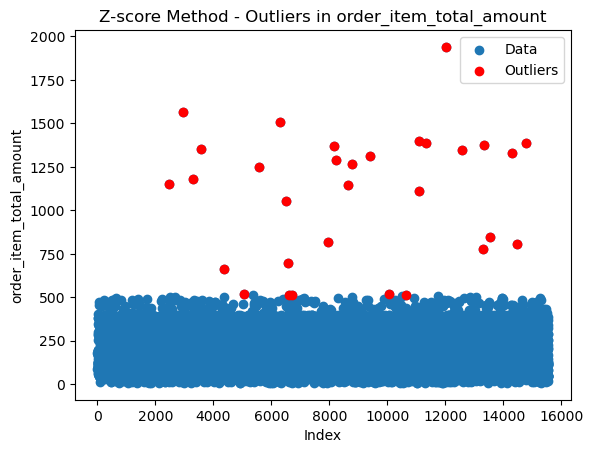

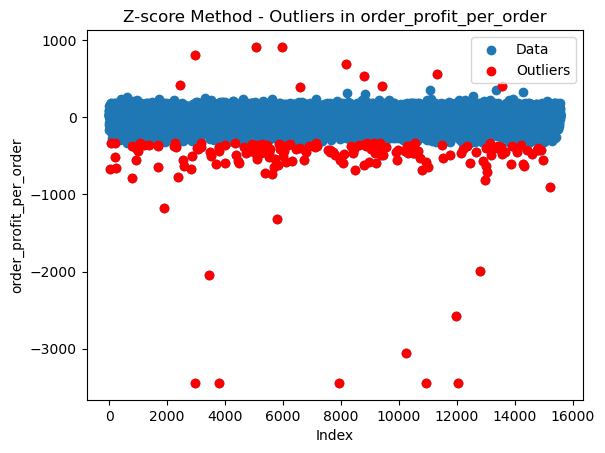

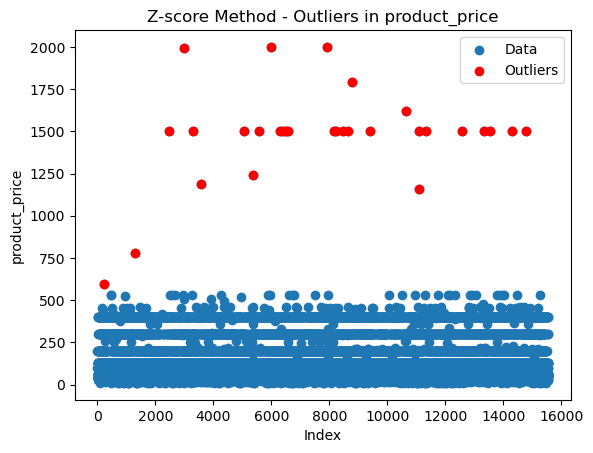

In [41]:
# Z-score method
def plot_outliers_zscore(df, cols, threshold=3):
    for col in cols:
        df['z_score'] = (df[col] - df[col].mean()) / df[col].std()
        plt.figure()
        plt.title(f'Z-score Method - Outliers in {col}')
        plt.scatter(df.index, df[col], label='Data')
        plt.scatter(df[df['z_score'].abs() > threshold].index, df[df['z_score'].abs() > threshold][col], color='r', label='Outliers')
        plt.legend()
        plt.xlabel('Index')
        plt.ylabel(col)
        plt.show()

plot_outliers_zscore(df, numeric_cols)


In [42]:
# Summary statistics to check for outliers or anomalies
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,profit_per_order,sales_per_customer,order_item_discount,order_item_discount_rate,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total_amount,order_profit_per_order,product_price,z_score
count,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,1.554900e+04
mean,22.604542,179.888256,20.782118,0.102717,137.005272,0.120391,2.165202,200.562289,179.780850,22.273342,136.629368,2.056365e-16
std,99.265198,113.727323,22.953833,0.070101,134.545269,0.474088,1.468627,125.984986,110.999735,117.503163,133.366285,1.000000e+00
min,-3442.500000,8.351162,0.000000,0.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-3442.500000,9.990000,-9.495606e-01
25%,7.562795,104.397330,6.000000,0.040000,50.000000,0.080000,1.000000,119.980000,105.570910,7.443977,50.000000,-6.495597e-01
50%,31.693370,165.944170,14.588252,0.100000,59.990000,0.270000,1.000000,199.920000,165.990000,32.440100,59.990000,-5.746532e-01
75%,63.872166,242.440930,30.000000,0.160000,199.990000,0.360000,3.000000,299.950000,242.436400,64.303566,199.990000,4.750873e-01
max,911.800000,1939.990000,500.000000,0.250000,1999.990000,0.500000,5.000000,1999.990000,1939.990000,911.800000,1999.990000,1.397175e+01


- z_score insight:
> - mean: The average z-score is extremely close to 0, which is expected.
> - std: The standard deviation is 1, indicating that the data is standardized.
> - min: The minimum z-score is around -0.95.
> - max: The maximum z-score is 13.97, indicating potential outliers.

#### Create new features : profit margin and delivery time in days

In [43]:
df['profit_margin'] = df['profit_per_order'] / df['sales_per_customer']

In [44]:
df['delivery_time_days'] = (df['shipping_date'] - df['order_date']).dt.days
df.head()

,payment_type,profit_per_order,sales_per_customer,category_name,customer_city,customer_country,customer_segment,customer_state,department_name,market,...,shipping_date,shipping_mode,label,order_date_only,shipping_date_only,order_time_only,shipping_time_only,z_score,profit_margin,delivery_time_days
0,DEBIT,34.448338,92.49099,Cardio Equipment,Caguas,Puerto Rico,Consumer,PR,Footwear,Europe,...,2015-08-12 23:00:00+00:00,Standard Class,Early Delivery,2015-08-11,2015-08-12,23:00:00,23:00:00,-0.274727,0.372451,1
1,TRANSFER,91.193540,181.99008,Water Sports,Albuquerque,EE. UU.,Consumer,CA,Fan Shop,LATAM,...,2017-04-08 23:00:00+00:00,Standard Class,Early Delivery,2017-02-10,2017-04-08,00:00:00,23:00:00,0.475087,0.501091,57
2,DEBIT,8.313806,89.96643,Indoor/Outdoor Games,Amarillo,Puerto Rico,Consumer,PR,Fan Shop,Europe,...,2015-03-18 00:00:00+00:00,Second Class,Delayed Delivery,2015-01-01,2015-03-18,00:00:00,00:00:00,-0.649710,0.092410,76
3,TRANSFER,-89.463196,99.15065,Cleats,Caguas,Puerto Rico,Consumer,PR,Apparel,LATAM,...,2017-03-18 00:00:00+00:00,Second Class,On-time Delivery,2017-05-30,2017-03-18,23:00:00,00:00:00,-0.574653,-0.902296,-74
4,DEBIT,44.722590,170.97824,Water Sports,Peabody,EE. UU.,Consumer,CA,Fan Shop,LATAM,...,2015-03-29 23:00:00+00:00,Standard Class,Delayed Delivery,2015-03-28,2015-03-29,00:00:00,23:00:00,0.475087,0.261569,1


#### Ensure there are no infinite values in the dataset

In [87]:
df = df.replace([float('inf'), -float('inf')], pd.NA)

#### Save cleaned data

In [88]:

df.to_csv('logistic_cleaned_data.csv', index=False)
print("Data cleaning complete. Cleaned data saved to 'logistic_cleaned_data.csv'.")

Data cleaning complete. Cleaned data saved to 'logistic_cleaned_data.csv'.


## Exploratory Data Analysis

### Profitability and Sales Analysis

- Key Data: profit_per_order, sales_per_customer, category_name, customer_segment, order_region, order_status.

**Analysis:**
  > - Identify the most profitable product categories and customer segments using aggregation techniques (e.g., group by category_name and customer_segment).
  > - Use descriptive statistics and visualizations to uncover trends in sales performance across different regions and customer demographics.
  > - Conduct Pareto analysis (80/20 rule) to determine which products or regions generate the most profit.

**Strategic Input:**
- Focus marketing and stocking efforts on high-performing categories or regions.

#### Descriptive statistics for profit and sales

In [53]:
profit_sales_desc = df[['profit_per_order', 'sales_per_customer']].describe()
print(profit_sales_desc)


       profit_per_order  sales_per_customer
count      15549.000000        15549.000000
mean          22.604542          179.888256
std           99.265198          113.727323
min        -3442.500000            8.351162
25%            7.562795          104.397330
50%           31.693370          165.944170
75%           63.872166          242.440930
max          911.800000         1939.990000


#### Profitability Analysis

In [89]:
def visualize_profitability_by_category(df, categorical_cols, profit_column='profit_per_order'):
    """
    Visualizes profitability by categorical columns in the given dataframe.
    
    Parameters:
    - df: DataFrame containing the data.
    - categorical_cols: List of categorical columns to be analyzed.
    - profit_column: Column representing profit in the dataframe (default is 'profit_per_order').
    """
    for col in categorical_cols:
        plt.figure(figsize=(12, 6))
        # Aggregating profit by the categorical column
        profit_by_category = df.groupby(col).agg({profit_column: 'sum'}).reset_index()
        
        # Sorting the categories by profit
        profit_by_category_top = profit_by_category.sort_values(by=profit_column, ascending=False).head(10)
        
        # Plotting
        sns.barplot(data=profit_by_category_top, x=col, y=profit_column)
        plt.title(f'Total Profit per {col.capitalize()}')
        plt.xlabel(col.capitalize())
        plt.ylabel('Total Profit')
        plt.xticks(rotation=45)
        plt.show()

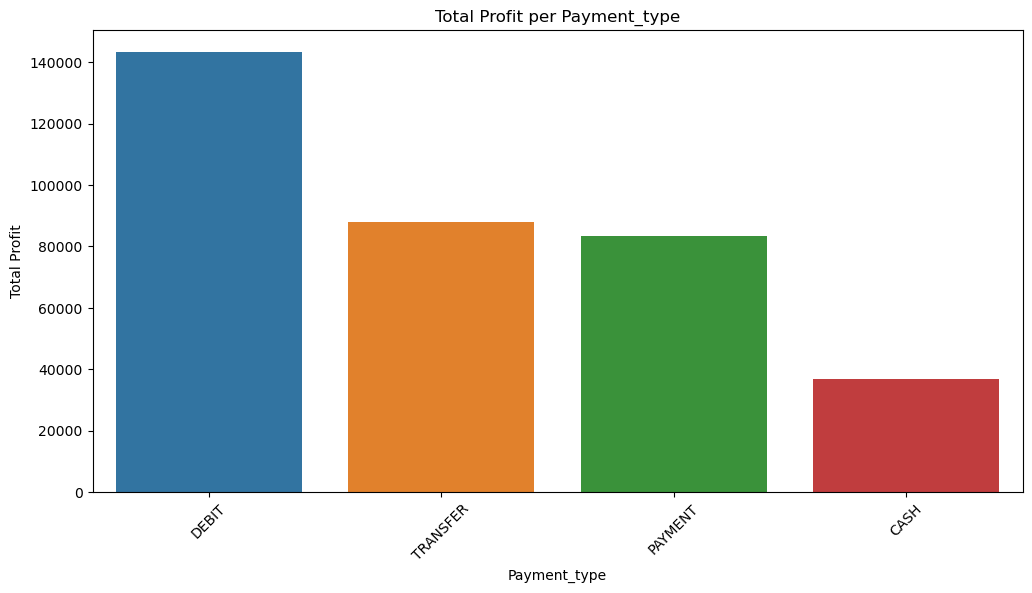

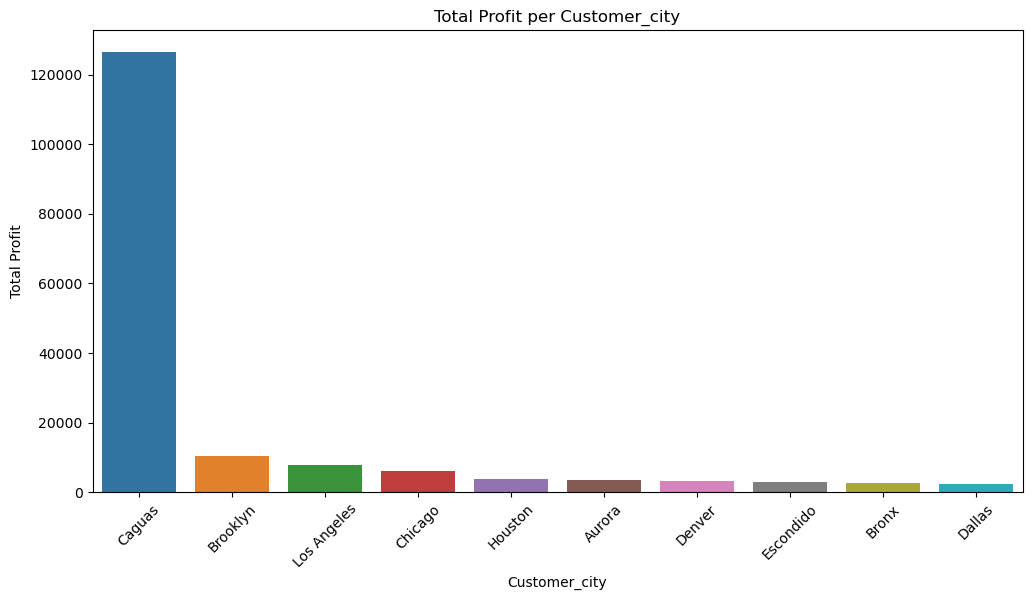

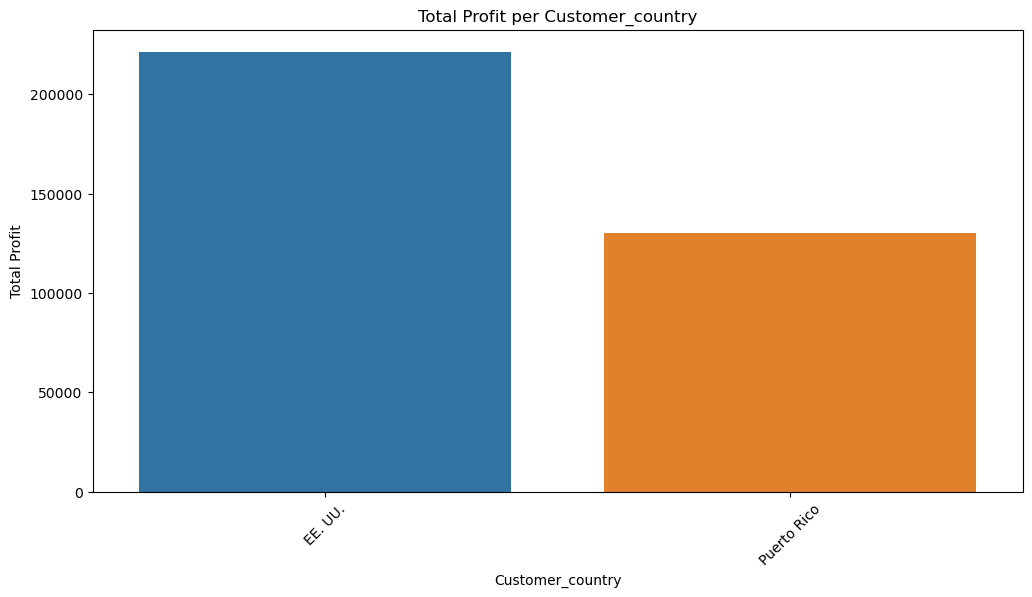

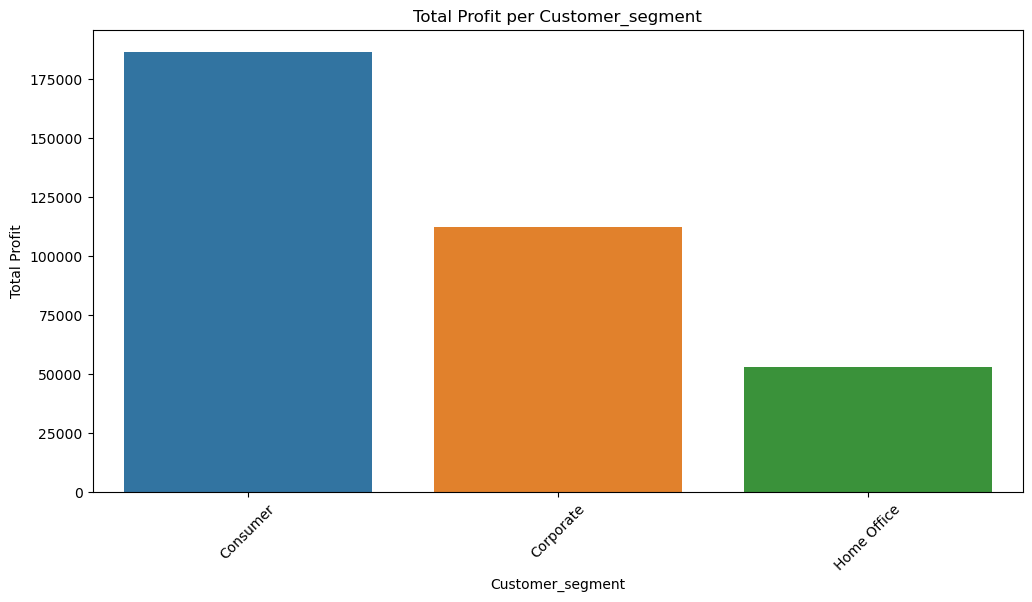

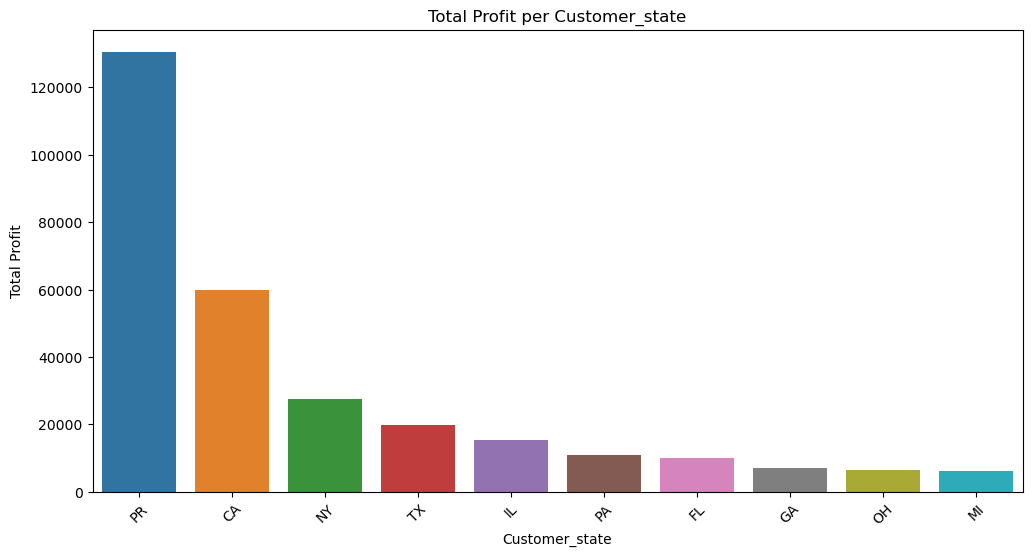

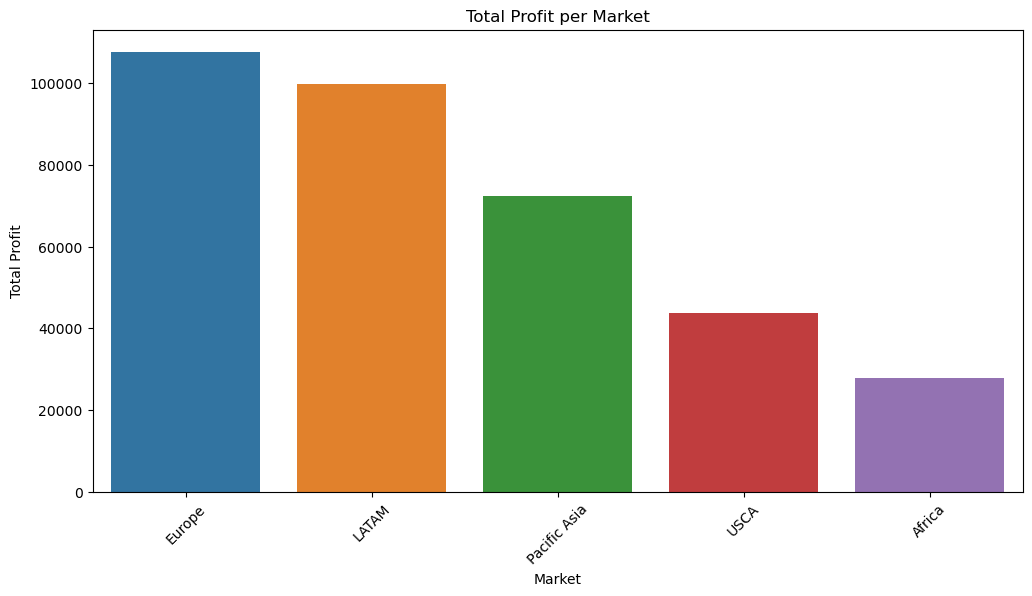

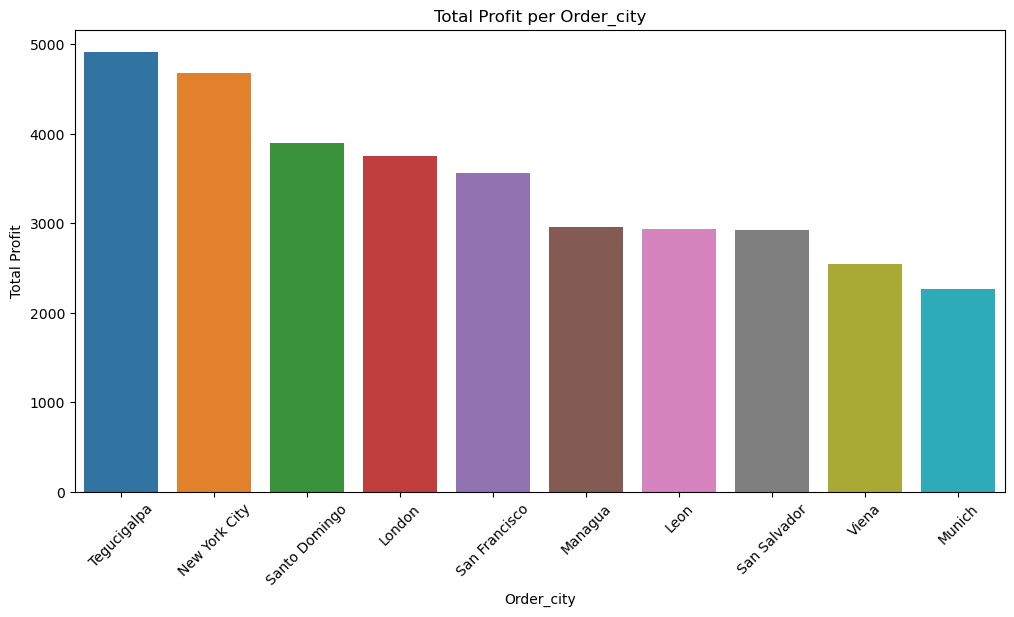

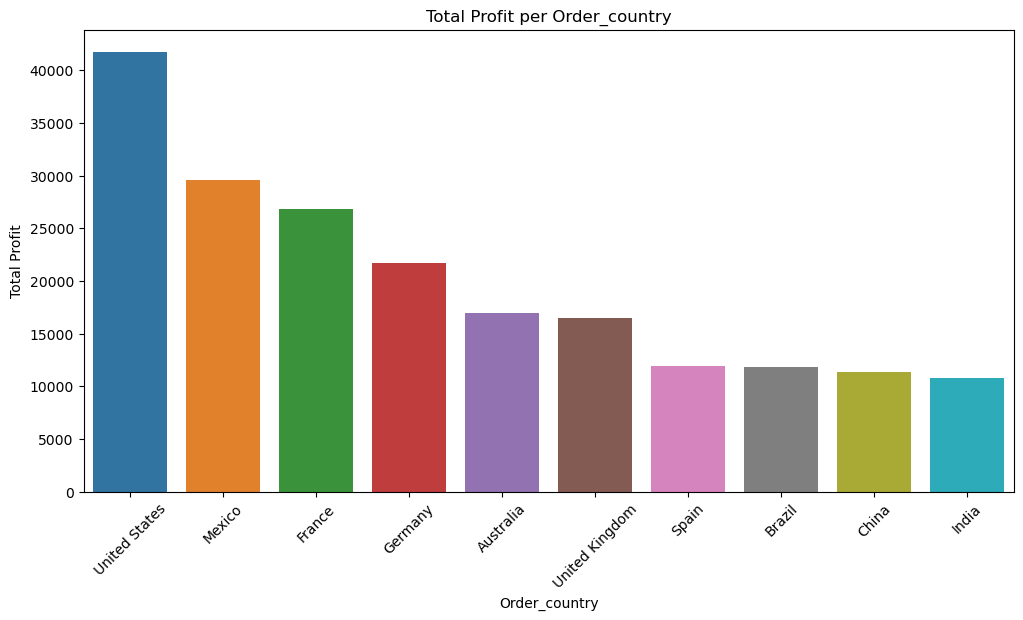

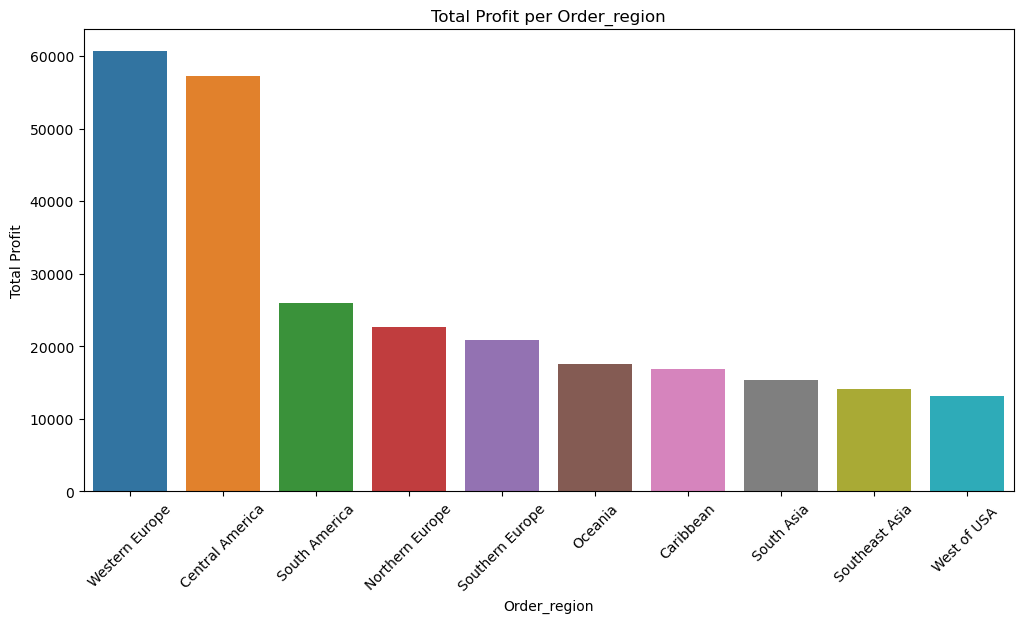

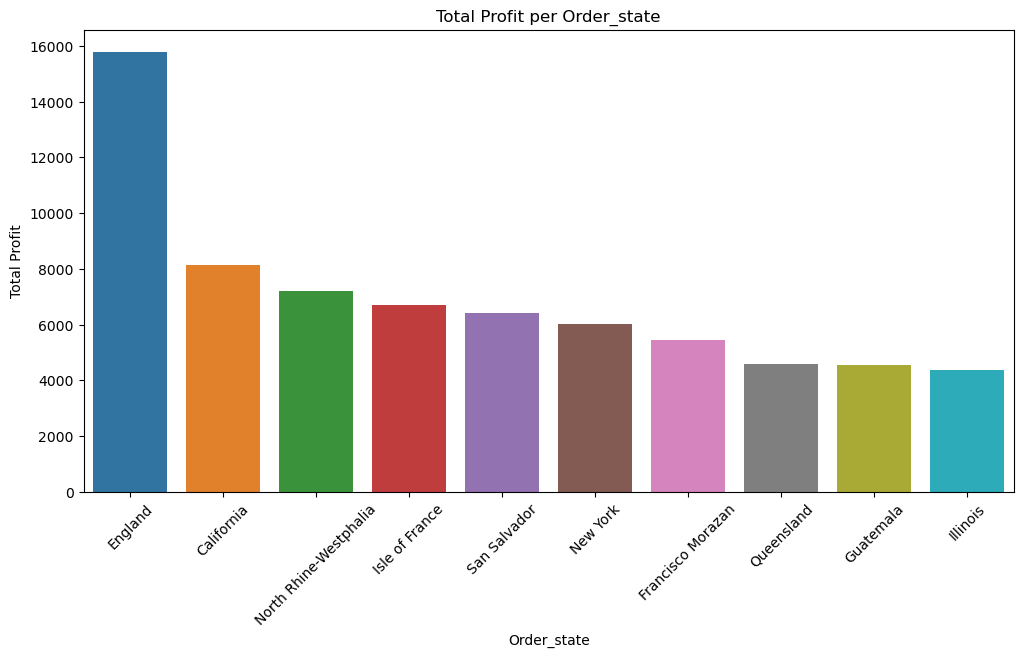

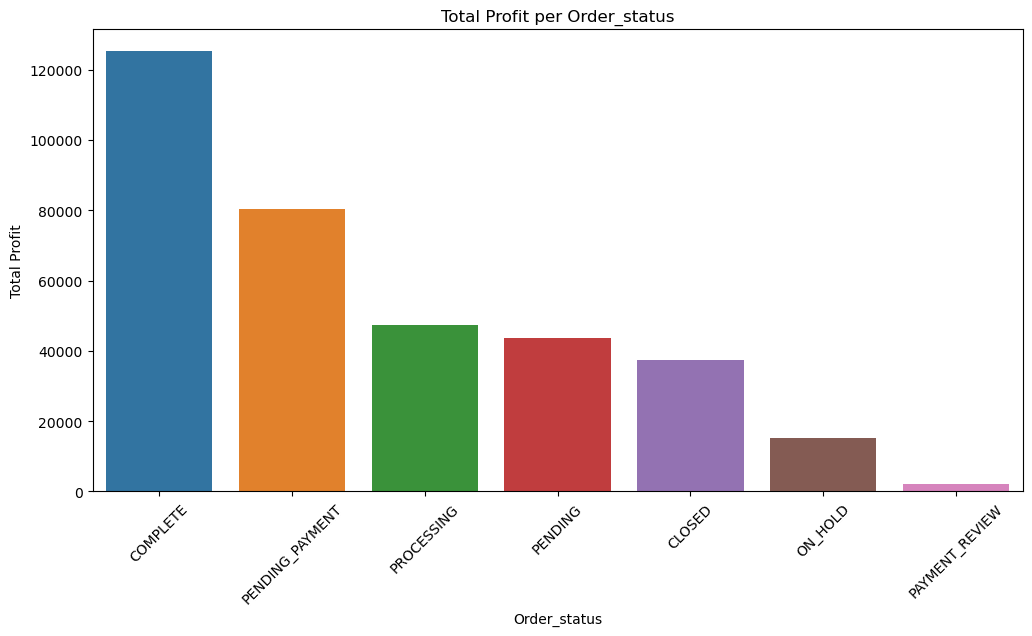

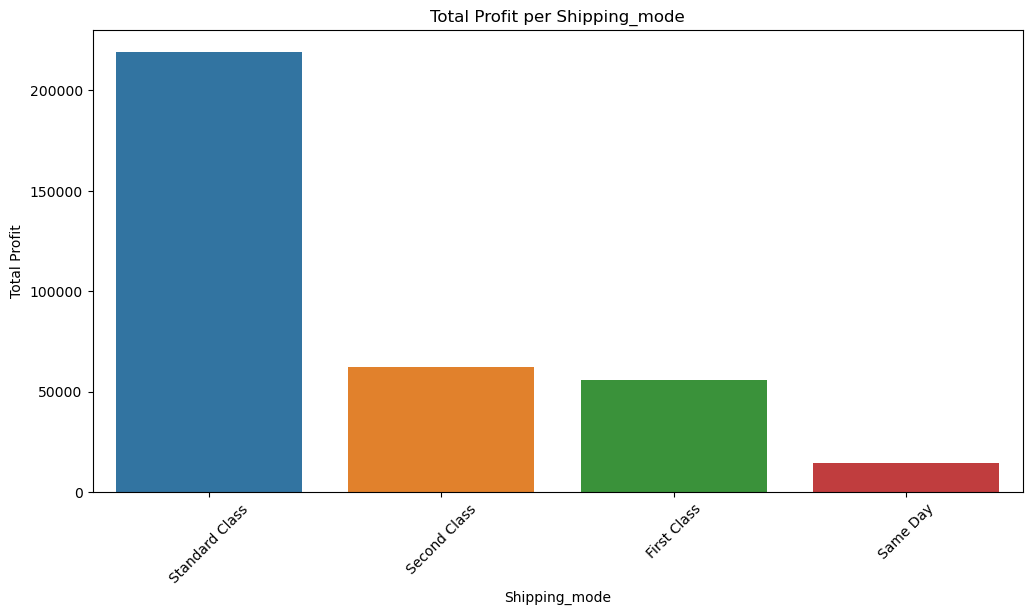

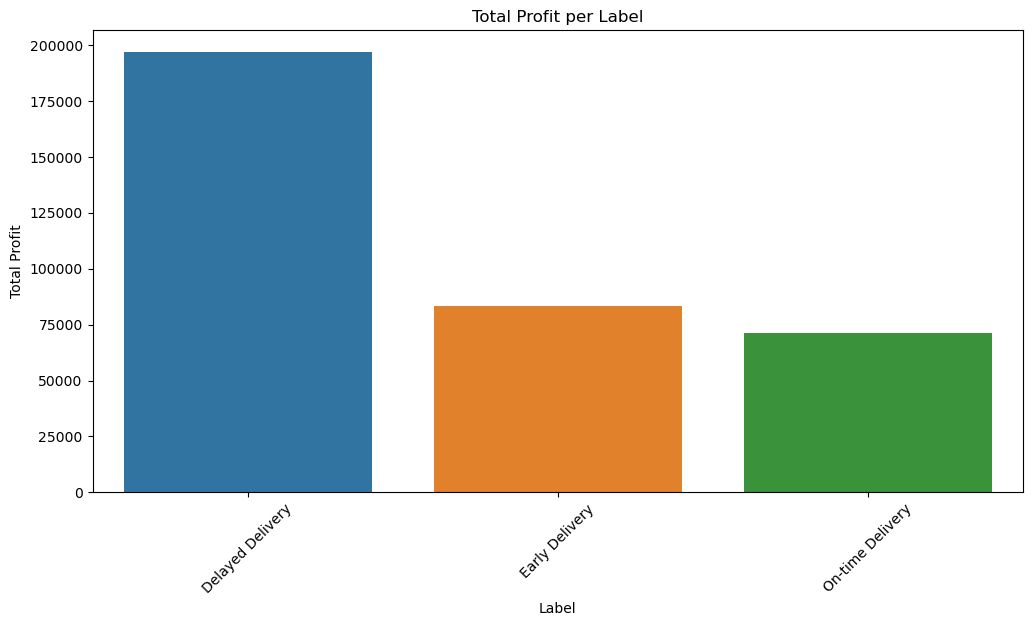

In [90]:
visualize_profitability_by_category(df, categorical_cols)

#### Sales Performance trend across top regions and customer demographics.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


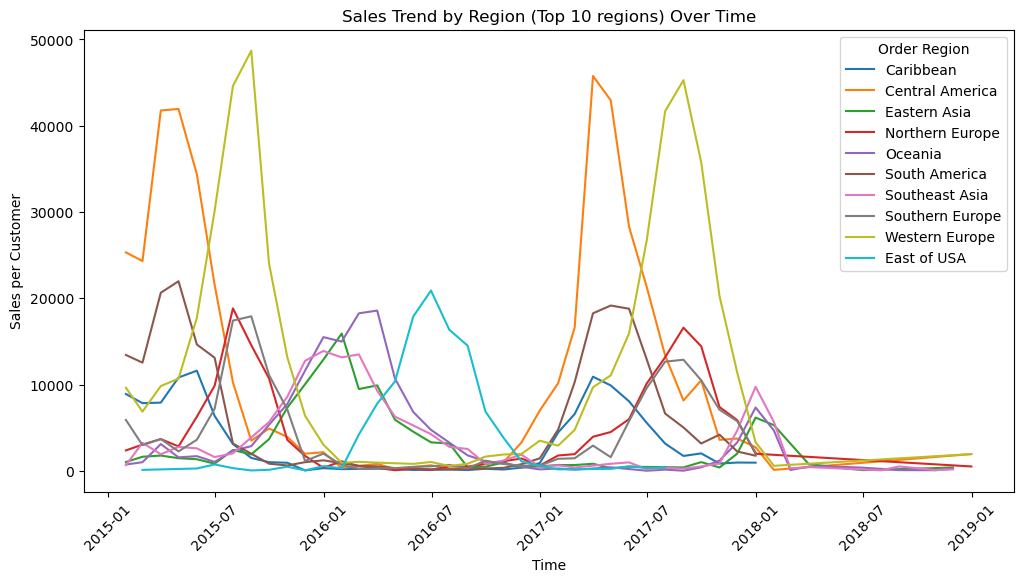

In [91]:
# 1. Get the top 10 regions by total sales
top_10_regions = df.groupby('order_region')['sales_per_customer'].sum().sort_values(ascending=False).head(10).index

# 2. Filter the dataframe to include only the top 10 regions
df_filtered_region = df[df['order_region'].isin(top_10_regions)]

# Plot for 'order_region' (Sales trend by top 10 regions)
plt.figure(figsize=(12, 6))
sales_trend_region = df_filtered_region.groupby([pd.Grouper(key='order_date', freq='M'), 'order_region'])['sales_per_customer'].sum().reset_index()
sns.lineplot(data=sales_trend_region, x='order_date', y='sales_per_customer', hue='order_region', markers=True)
plt.title('Sales Trend by Region (Top 10 regions) Over Time')
plt.xlabel('Time')
plt.ylabel('Sales per Customer')
plt.xticks(rotation=45)
plt.legend(title='Order Region')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


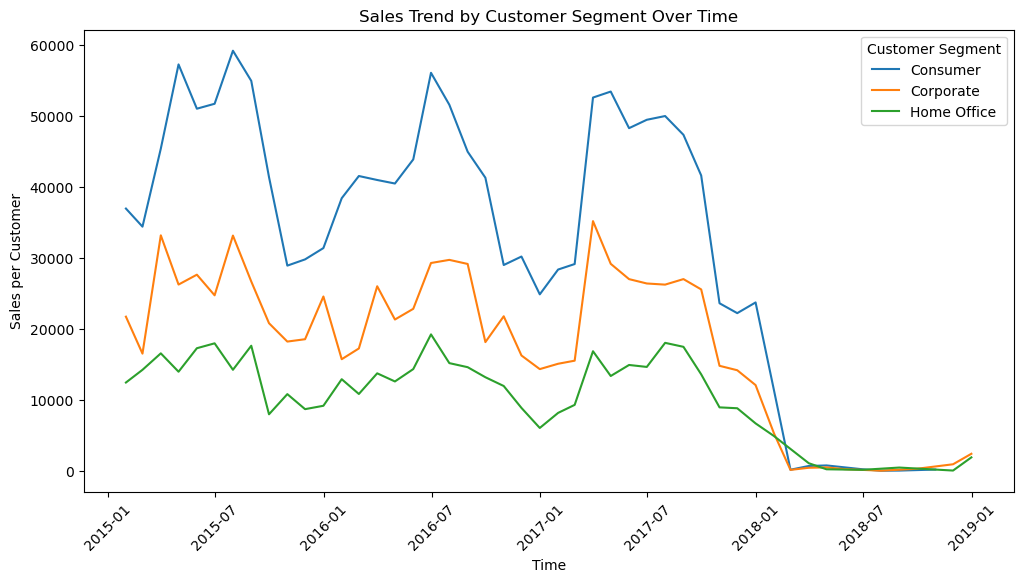

In [92]:
# 3. Plot for 'customer_segment' (Sales trend by customer segment across all regions)
plt.figure(figsize=(12, 6))
sales_trend_segment = df.groupby([pd.Grouper(key='order_date', freq='M'), 'customer_segment'])['sales_per_customer'].sum().reset_index()
sns.lineplot(data=sales_trend_segment, x='order_date', y='sales_per_customer', hue='customer_segment', markers=True)
plt.title('Sales Trend by Customer Segment Over Time')
plt.xlabel('Time')
plt.ylabel('Sales per Customer')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.show()

#### Pareto analysis (80/20 rule)
- To conduct Pareto analysis (80/20 rule), we will identify which products or regions generate the most profit.
- This approach suggests that roughly 80% of the profit comes from 20% of the products or regions. We'll do this by sorting the data based on profit and calculating cumulative profit contribution to determine the "vital few."
- We'll use the profit_per_order column that already exists in the DataFrame.

In [93]:
# For Products (Based on product_category_id or product_name):

# 1. Calculate total profit by region
profit_by_region = df.groupby('order_region')['profit_per_order'].sum().reset_index()

# Sort by total profit in descending order
profit_by_region_sorted = profit_by_region.sort_values(by='profit_per_order', ascending=False)


In [94]:
# 2. Calculate cumulative profit percentage
profit_by_region_sorted['cumulative_profit'] = profit_by_region_sorted['profit_per_order'].cumsum()
profit_by_region_sorted['cumulative_profit_percentage'] = 100 * profit_by_region_sorted['cumulative_profit'] / profit_by_region_sorted['profit_per_order'].sum()


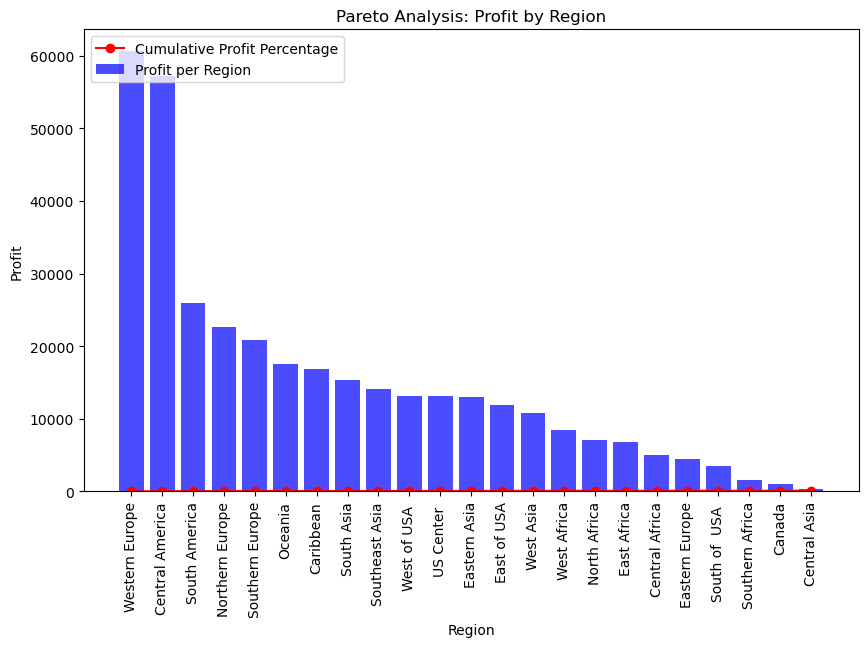

In [95]:
# 3. Plot Pareto chart for regions
plt.figure(figsize=(10, 6))
plt.bar(profit_by_region_sorted['order_region'], profit_by_region_sorted['profit_per_order'], color='blue', alpha=0.7, label='Profit per Region')
plt.plot(profit_by_region_sorted['order_region'], profit_by_region_sorted['cumulative_profit_percentage'], color='red', marker='o', label='Cumulative Profit Percentage')
plt.title('Pareto Analysis: Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()


In [97]:
# 4. Apply the 80/20 rule to identify top contributing regions
top_regions_80_20 = profit_by_region_sorted[profit_by_region_sorted['cumulative_profit_percentage'] <= 80]
print("Regions contributing to the top 80% of profit:")
top_regions_80_20

Regions contributing to the top 80% of profit:


,order_region,profit_per_order,cumulative_profit,cumulative_profit_percentage
22,Western Europe,60610.037890,60610.037890,17.244332
3,Central America,57190.904159,117800.942048,33.515877
12,South America,26016.005645,143816.947694,40.917764
10,Northern Europe,22656.560940,166473.508634,47.363846
17,Southern Europe,20818.258774,187291.767408,53.286908
11,Oceania,17502.492664,204794.260071,58.266591
1,Caribbean,16899.854421,221694.114492,63.074816
13,South Asia,15383.135637,237077.250129,67.451515
15,Southeast Asia,14141.331414,251218.581542,71.474905
21,West of USA,13148.769776,264367.351319,75.215899


## 3. Customer Segmentation and Behavior
- Key Data: customer_city, customer_segment, category_name, sales_per_customer.
### Analysis:
- Use clustering algorithms (e.g., K-means) to segment customers based on purchasing behavior and location.
- Analyze customer preferences by segment and correlate with product categories.
### Strategic Input:
- Tailor promotional strategies and campaigns for each segment to boost customer retention and acquisition.

## 4. Demand Forecasting
- Key Data: product_name, product_price, shipping_date, order_status.
### Analysis:
- Perform time-series analysis (e.g., ARIMA, seasonal decomposition) to forecast demand for specific product categories and regions.
- Incorporate seasonality and trends from shipping_date and order_status for improved accuracy.
### Strategic Input:
- Align inventory and production schedules with predicted demand to minimize stockouts and excess inventory.

## 5. Shipping and Logistics Optimization
- Key Data: order_region, order_state, shipping_mode, label.
### Analysis:
- Evaluate shipping modes (Standard Class, Second Class) and their impact on delivery times and customer satisfaction.
- Use geospatial analysis to assess the efficiency of regional shipping strategies.
### Strategic Input:
- Optimize shipping routes and methods to improve delivery speed and reduce costs.

## 6. Payment Type Insights
- Key Data: payment_type, profit_per_order, sales_per_customer.
### Analysis:
- Analyze the correlation between payment_type (e.g., DEBIT, TRANSFER) and profitability or sales.
- Identify payment preferences by customer segment or region.
### Strategic Input:
- Offer promotions for preferred payment types to enhance customer satisfaction and transaction speed.

## 7. Regional Analysis
- Key Data: customer_country, customer_state, order_region, profit_per_order.
### Analysis:
- Evaluate regional sales performance and profitability.
- Identify underperforming regions and potential growth markets using heatmaps or geospatial visualizations.
### Strategic Input:
- Allocate resources and marketing efforts based on regional performance.

## 8. Visualization and Reporting
- Use Power BI to create dashboards showcasing:
> - Sales trends by region, category, and customer segment.
> - Profitability metrics for products and regions.
> - Demand forecasts and inventory recommendations.
> - Shipping efficiency metrics and customer satisfaction insights.

## Deliverables:
- Interactive Dashboards: Present trends, forecasts, and actionable insights for decision-makers.
- Executive Summary Report: Highlight key findings and strategic recommendations for profit optimization, improved customer targeting, and logistics efficiency.
- Forecasting and Optimization Models: Provide models for demand prediction and inventory management tailored to the FMCG sector.